In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)

In [2]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [5]:
iris = pd.DataFrame({'f1' : X[:,0],
                    'f2' : X[:,1],
                    'f3' : X[:,2],
                    'f4' : X[:,3],
                    'target' : y})

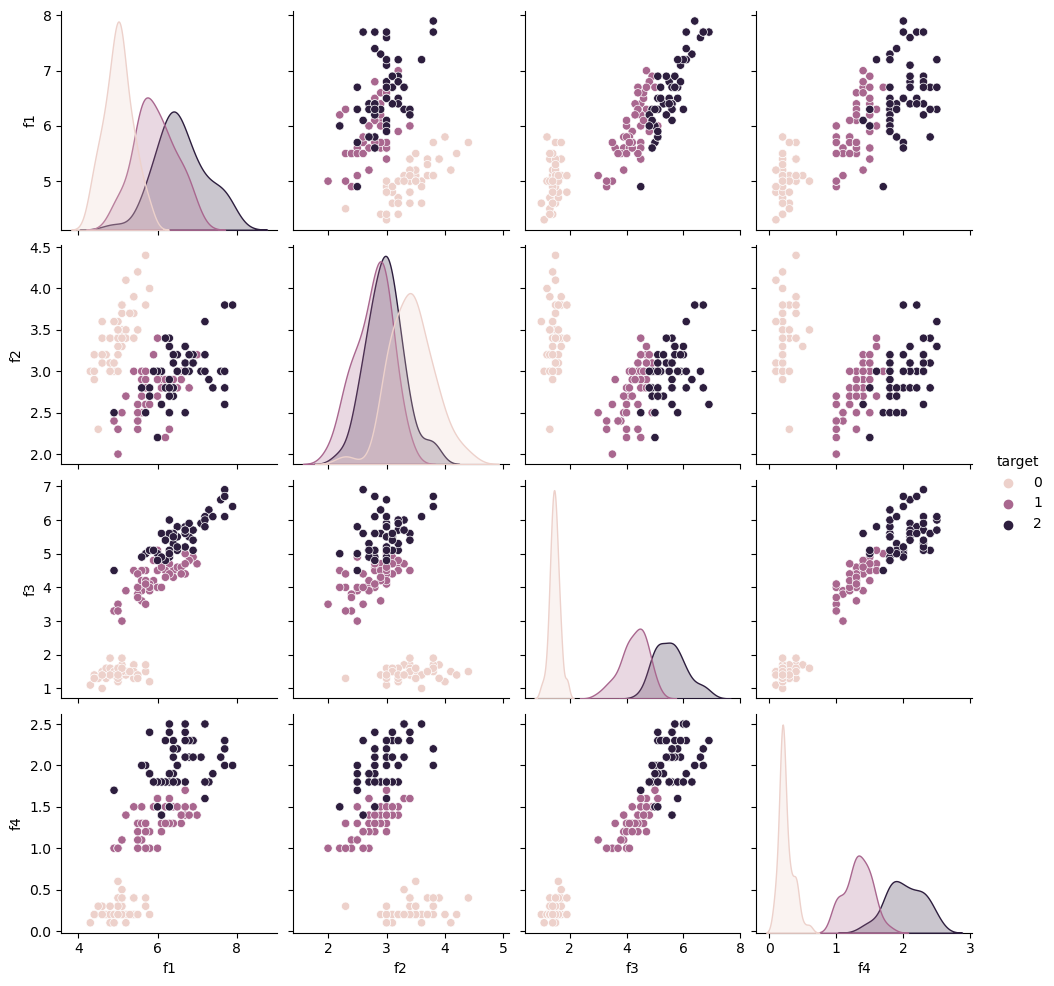

In [8]:
sns.pairplot(data=iris, hue='target')

In [9]:
lr = LogisticRegression().fit(X, y)

C:\Users\gaponovpavel\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
lr.predict_proba(X)

array([[9.81797141e-01, 1.82028445e-02, 1.44269293e-08],
       [9.71725476e-01, 2.82744937e-02, 3.01659208e-08],
       [9.85444223e-01, 1.45557643e-02, 1.23263078e-08],
       [9.76282998e-01, 2.37169623e-02, 3.97229604e-08],
       [9.85381263e-01, 1.46187255e-02, 1.19450737e-08],
       [9.70457205e-01, 2.95427213e-02, 7.35307149e-08],
       [9.86879212e-01, 1.31207678e-02, 1.99800358e-08],
       [9.76395201e-01, 2.36047710e-02, 2.76315897e-08],
       [9.79831319e-01, 2.01686506e-02, 3.06875994e-08],
       [9.69130364e-01, 3.08696046e-02, 3.16498069e-08],
       [9.76506883e-01, 2.34930977e-02, 1.92207309e-08],
       [9.75396301e-01, 2.46036553e-02, 4.38552739e-08],
       [9.74557148e-01, 2.54428301e-02, 2.14857551e-08],
       [9.91967765e-01, 8.03223109e-03, 3.89483945e-09],
       [9.88209458e-01, 1.17905393e-02, 2.80767915e-09],
       [9.86771830e-01, 1.32281572e-02, 1.27909501e-08],
       [9.88115327e-01, 1.18846639e-02, 9.19925673e-09],
       [9.81552606e-01, 1.84473

In [16]:
plt.figure(figsize=(13,13))
ans = lr.predict_proba(X)
sures = pd.DataFrame({'prob_1' : ans[:,0], 'prob_2' : ans[:,1], 'prob_3' : ans[:,2]})
sns.histplot(data=sures, kde=True)

<AxesSubplot:ylabel='Count'>

In [14]:
plt.figure(figsize=(13,13))
sns.kdeplot(data=sures)

<AxesSubplot:ylabel='Density'>

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

In [18]:
cross_val_score(clf, X, y, cv=10)

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [19]:
clf = DecisionTreeClassifier().fit(X, y)

In [20]:
from sklearn import tree
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 2
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [23]:
import numpy as np
import matplotlib.pyplot as plt

class_1 = np.random.randn(100,2)*0.2 + np.array([1.,1.])
class_2 = np.random.randn(100,2)*0.2 + np.array([1.,1.])

plt.figure(figsize=(13,13))
plt.scatter(class_1[:,0], class_1[:,1])
plt.scatter(class_2[:,0], class_2[:,1])

In [24]:
X = np.concatenate([class_1, class_2])
y = np.array([0 if i<100 else 1 for i in range(200)])

In [25]:
lr = LogisticRegression().fit(X,y)
clf = DecisionTreeClassifier().fit(X,y)

In [26]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 0.62
|   |--- class: 0
|--- feature_0 >  0.62
|   |--- feature_1 <= 0.79
|   |   |--- feature_1 <= 0.77
|   |   |   |--- feature_1 <= 0.73
|   |   |   |   |--- feature_0 <= 1.11
|   |   |   |   |   |--- feature_1 <= 0.62
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  0.62
|   |   |   |   |   |   |--- feature_0 <= 0.82
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_0 >  0.82
|   |   |   |   |   |   |   |--- feature_0 <= 0.94
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  0.94
|   |   |   |   |   |   |   |   |--- feature_1 <= 0.66
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_1 >  0.66
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  1.11
|   |   |   |   |   |--- feature_0 <= 1.37
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_0 >  1.37
|   |   |   |   |   |  

In [27]:
x_ = np.linspace([-2,-2], [2,2], 100)
y_ = lr.coef_[0][0]*x_ + lr.coef_[0][1]

In [28]:
plt.figure(figsize=(13,13))
plt.scatter(class_1[:,0], class_1[:,1])
plt.scatter(class_2[:,0], class_2[:,1])
plt.plot(x_,y_)
plt.plot([-2.,2.], [0.09,0.09])

In [29]:
class_1 = np.concatenate([np.random.randn(100,2)*0.2 + np.array([-1.,-1.]), np.random.randn(100,2)*0.2 + np.array([1.,1.])])
class_2 = np.concatenate([np.random.randn(100,2)*0.2 + np.array([-1.,1.]), np.random.randn(100,2)*0.2 + np.array([1.,-1.])])

plt.figure(figsize=(13,13))
plt.scatter(class_1[:,0], class_1[:,1])
plt.scatter(class_2[:,0], class_2[:,1])

In [31]:
X = np.concatenate([class_1, class_2])
y = np.array([0 if i<200 else 1 for i in range(400)])

In [32]:
lr = LogisticRegression().fit(X,y)
clf = DecisionTreeClassifier().fit(X,y)

In [33]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 1.21
|   |--- feature_0 <= 0.94
|   |   |--- feature_1 <= -0.57
|   |   |   |--- feature_0 <= 0.04
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  0.04
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.57
|   |   |   |--- feature_0 <= -0.04
|   |   |   |   |--- feature_1 <= -0.06
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  -0.06
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  -0.04
|   |   |   |   |--- feature_1 <= -0.03
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  -0.03
|   |   |   |   |   |--- class: 0
|   |--- feature_0 >  0.94
|   |   |--- feature_1 <= -0.12
|   |   |   |--- class: 1
|   |   |--- feature_1 >  -0.12
|   |   |   |--- class: 0
|--- feature_0 >  1.21
|   |--- feature_1 <= -0.04
|   |   |--- class: 1
|   |--- feature_1 >  -0.04
|   |   |--- class: 0



In [34]:
plt.figure(figsize=(13,13))
plt.scatter(class_1[:,0], class_1[:,1])
plt.scatter(class_2[:,0], class_2[:,1])
plt.plot(x_,y_)
plt.plot([-2.,2.], [0.09,0.09])

In [35]:
fig = plt.figure(figsize=(25,20))
plt.grid()
_ = tree.plot_tree(clf,
                  feature_names=['F1', 'F2'],
                  class_names=['class1', 'class2'],
                  filled=True)